# TITANIC DATA ANALYSIS AND MODEL TRAINING 

In [182]:
# STEPS FOR DOING THIS PROJECT ARE : DATA ACQUISITION , DATA ANALYSIS, DATA CLEANING, MODEL TRAINING, ACCURACY CHECKING

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [127]:
titanic_data = pd.read_csv(r'D:\machine learning practice\titanic\data.csv')

In [128]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
'''
pclass = passenger class
sibsb = no of siblings
parch = parents
embarled = place from passenger arrive to ship
'''

'\npclass = passenger class\nsibsb = no of siblings\nparch = parents\nembarled = place\n'

In [130]:
#total no. of passengers
print('the total no. of passengers present in titanic data set are : ' + str(len(titanic_data.index)))

the total no. of passengers present in titanic data set are : 891


# ANALYZE DATA

<AxesSubplot:xlabel='Survived', ylabel='count'>

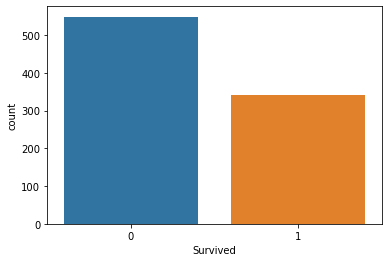

In [131]:
sns.countplot(x ='Survived', data = titanic_data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

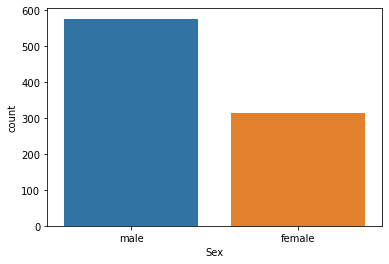

In [132]:
sns.countplot(x ='Sex', data = titanic_data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

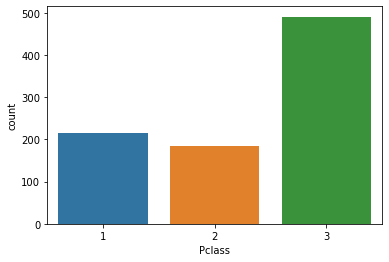

In [133]:
sns.countplot(x ='Pclass', data = titanic_data)

In [134]:
# now we plot same sns.countplot(x ='Survived', data = titanic_data) this one but on the basis of sex

<AxesSubplot:xlabel='Survived', ylabel='count'>

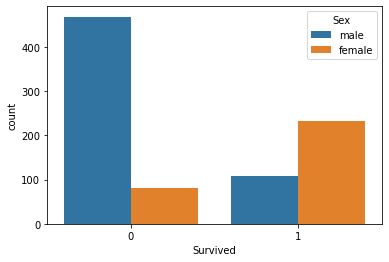

In [135]:
sns.countplot(x ='Survived', hue='Sex',data = titanic_data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

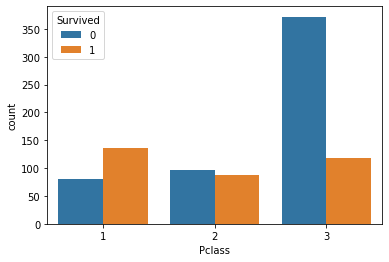

In [136]:
sns.countplot(x ='Pclass', hue='Survived',data = titanic_data)

<AxesSubplot:ylabel='Frequency'>

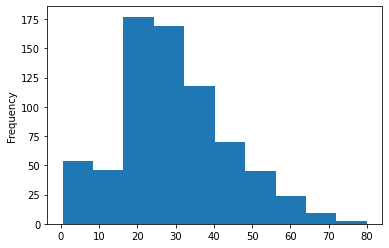

In [137]:
titanic_data['Age'].plot.hist()

In [138]:
titanic_data['Age'].mean()

29.69911764705882

<AxesSubplot:ylabel='Frequency'>

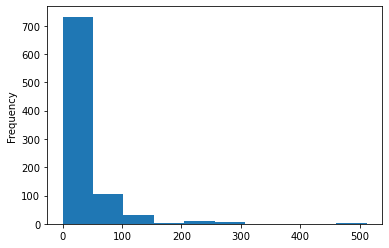

In [139]:
titanic_data['Fare'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

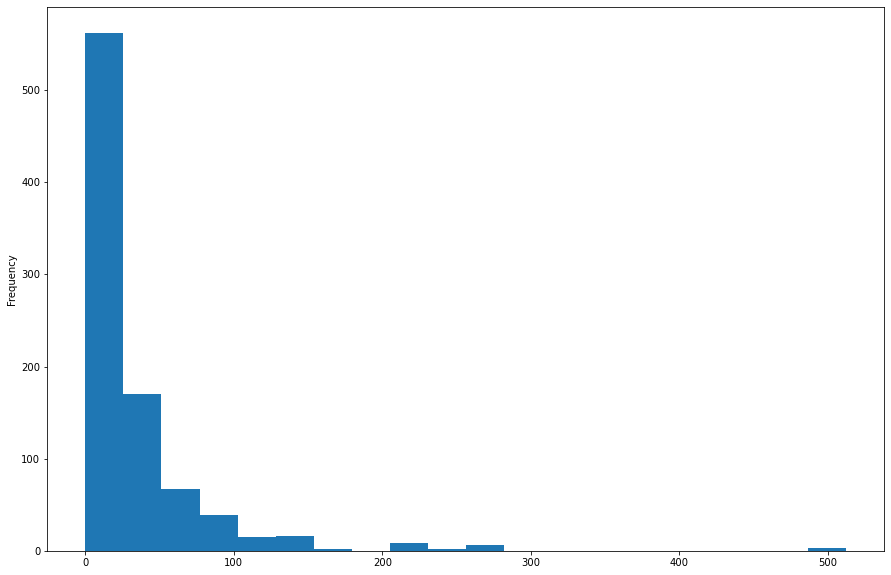

In [140]:
titanic_data['Fare'].plot.hist(bins=20,figsize=(15,10))

# DATA WRANGLING OR DATA CLEANING

In [141]:
# FIRST WE CHECK THAT OUR DATA IS NULL OR NOT 

In [142]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [143]:
# true means null, false means not null

In [144]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

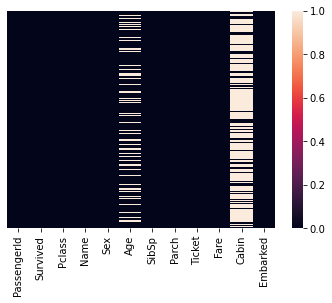

In [145]:
sns.heatmap(titanic_data.isnull(), yticklabels =False)

In [146]:
# from the above diagram you can see that 20% age data are emply are thee are large number of cabin data are empty
# we have to remove the Cabin column as there are 687 empty values

titanic_data.drop('Cabin',axis = 1,inplace = True)

In [147]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [148]:
# we can see after all processes we can apply logistic regression to the survival column so we will make our outcome Y = survived


In [149]:
#we have to drop na values
titanic_data.dropna(inplace=True)

<AxesSubplot:>

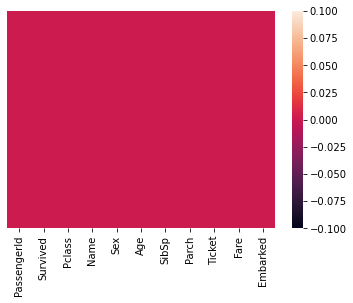

In [150]:
sns.heatmap(titanic_data.isnull(),yticklabels = False)

In [151]:
#now there is no null value
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [152]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [153]:
titanic_data.shape

(712, 11)

In [154]:
# now you can see that data is reduced to 712 from 891, this is because we have dropped the na values , but doing dropping will lead to data loss, we will learn further how to replace nan values so that we can prevent our data to be lost
# whenever you train model by machine learning make sure that you have no string values because ml does't take string as input value

In [155]:
# we have to basically split sex column into male and female , lets do it
# we have inbuilt function "dummy variable" in pandas lets implement it

In [156]:
pd.get_dummies(titanic_data['Sex']) 

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [157]:
# we can identify only one column to see weather it is male or female, so lets drop first column(female)

In [158]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True) 
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [159]:
embark = pd.get_dummies(titanic_data['Embarked'],drop_first=True) 
embark.head()
#we are dropping first because both 0-0 means that it is (C)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [160]:
Pcl = pd.get_dummies(titanic_data['Pclass'],drop_first=True) 
Pcl.head()
#we are dropping first because both 0-0 means that it is (1)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [161]:
#  NOW OUR NEXT STEP IS TO CONCATINATE ALL THESE VALUE INTO OUR DATASET

In [162]:
titanic_data = pd.concat([titanic_data,sex,Pcl,embark],axis = 1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [163]:
titanic_data.drop(['Pclass','Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [164]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Train Data

In [165]:
X=titanic_data.drop('Survived',axis=1)
y=titanic_data['Survived']
# inplace is not used here because we are creating variable x and we have to return data into x 
# inplace true is used on same data set operation
# When inplace = True is used, it performs operation on data and nothing is returned. df.some_operation(inplace=True) When inplace=False is used, it performs operation on data and returns a new copy of data

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [168]:
#now we will create the instance og logistic regression

In [169]:
logmodel = LogisticRegression()

In [170]:
#now we will fit the data in our logistic model


In [171]:
logmodel.fit(X_train,y_train)

C:\Users\verma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [172]:
predictions = logmodel.predict(X_test)

In [176]:
from sklearn.metrics import classification_report

In [177]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.79      0.82      0.81       136\n           1       0.74      0.71      0.73        99\n\n    accuracy                           0.77       235\n   macro avg       0.77      0.77      0.77       235\nweighted avg       0.77      0.77      0.77       235\n'

In [178]:
from sklearn.metrics import confusion_matrix

In [179]:
confusion_matrix(y_test,predictions)

array([[112,  24],
       [ 29,  70]], dtype=int64)

In [180]:
#we can also check accuracy from confusion metrics but we have an inbuilt function in python
from sklearn.metrics import accuracy_score

In [181]:
accuracy_score(y_test,predictions)

0.774468085106383